In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/Movie_Review.csv')

In [ ]:
data


,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


In [ ]:
data.dropna(inplace=True)

In [ ]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [ ]:
data['text'] = data['text'].apply(clean_review)

In [ ]:
#wordcloud

from wordcloud import WordCloud

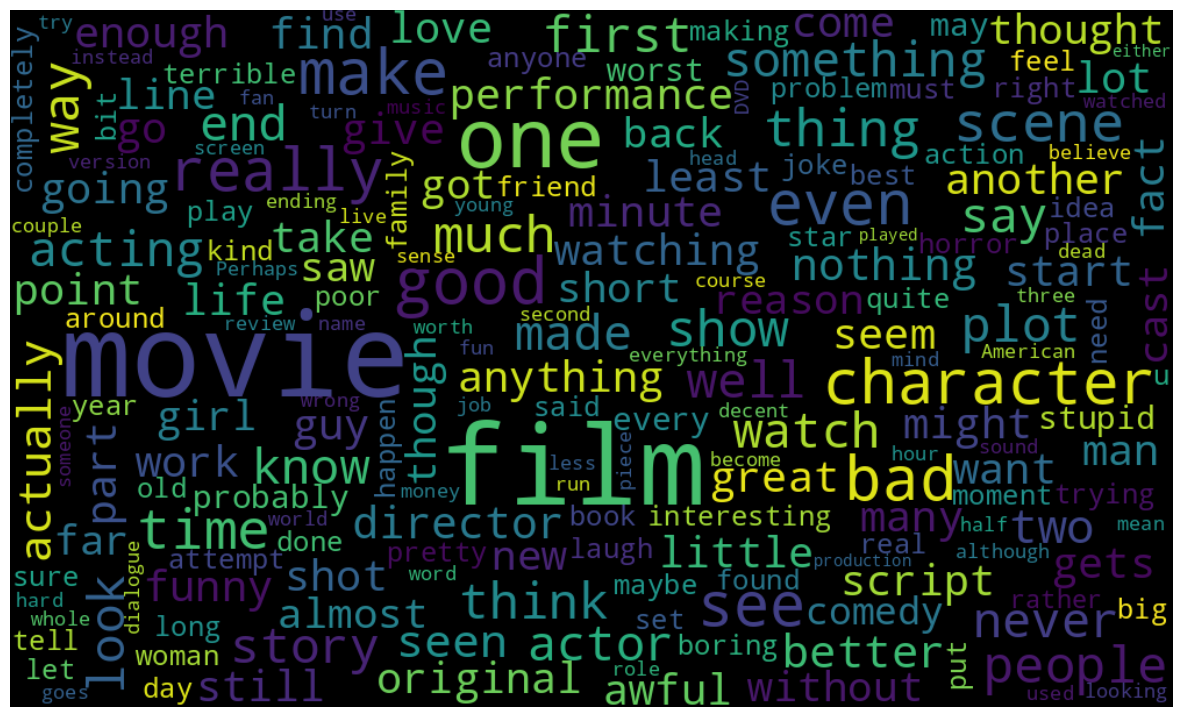

In [ ]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

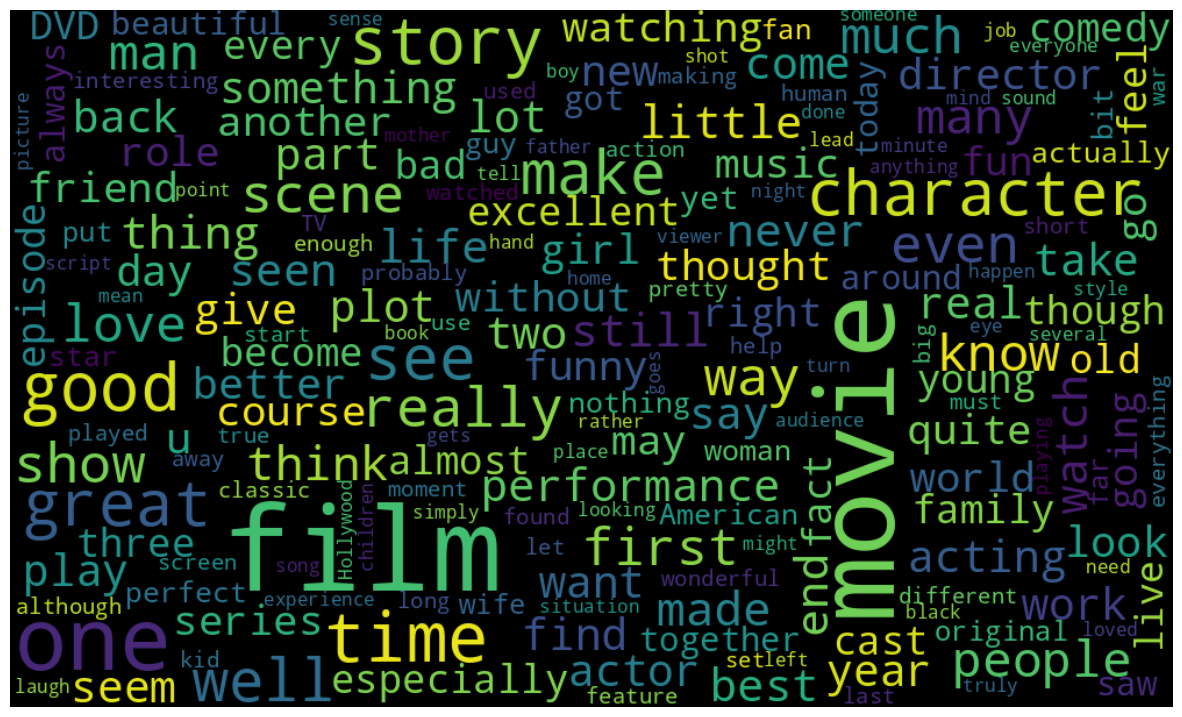

In [ ]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=100000)

In [ ]:
reviews = cv.fit_transform(data['text']).toarray()

In [ ]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

/tmp/ipython-input-3769914066.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
0,500
1,500


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [ ]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [ ]:
predict = model.predict(reviews_test)

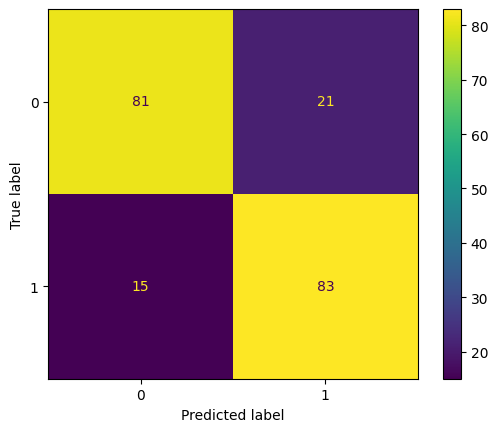

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [ ]:
import pickle as pk

In [ ]:
pk.dump(model,open('model.pkl','wb'))

In [ ]:
pk.dump(cv, open('vectorizer.pkl','wb'))